# IMPORTS

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# FUNCTIONS

In [2]:
def plot_scatter_with_colors(df, x='norm_shenkin_rel', y='MES', colors=None, DPI = 300, out = None):
    
    if colors is None:
        raise ValueError("You must provide a list of colors.")

    # Get integer index from bs_id like "BS3" -> 3
    indices = df['bs_id'].str.extract(r'BS(\d+)')[0].astype(int)

    # Plot
    plt.figure(figsize=(5, 5), dpi = DPI)
    for i, row in df.iterrows():
        color_idx = int(indices.loc[i])
        plt.scatter(row[x], row[y], edgecolor = "k", linewidth = 1, s = 200, color=colors[color_idx], label=f'BS{color_idx}' if f'BS{color_idx}' not in plt.gca().get_legend_handles_labels()[1] else "")

    plt.axhline(y=0, color='k', linestyle='--', linewidth = 1)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.ylim(-0.35, 0.35)
    plt.axvline(x=50, color='k', linestyle='--', linewidth = 1)
    plt.xlim(-10, 110)
    plt.xlabel("NShenkin")
    plt.legend().set_visible(False)
    plt.xticks([0, 25, 50, 75, 100])
    plt.tight_layout()
    if out != None:
        plt.savefig(out)
    plt.show()

colors = [
    '#cc5151',
    '#7f3333',
    '#51cccc',
    '#337f7f',
    '#8ecc51',
    '#597f33',
    '#8e51cc',
]

# READING INPUT

In [3]:
fragsys_dir = "./../FAM83B_FRAGSYS/"

panddas = pd.read_csv(os.path.join(fragsys_dir, "pandda_filt_df.csv"))

prots = pd.read_pickle(os.path.join(fragsys_dir, "all_prots.pkl"))

bss = pd.read_pickle(os.path.join(fragsys_dir, "all_bss.pkl"))

ress = pd.read_pickle(os.path.join(fragsys_dir, "all_bs_ress.pkl"))

rsa_mm = pd.read_pickle(os.path.join(fragsys_dir, "rsa_cluster_membership.pkl"))

In [4]:
sorted(panddas.query('entry_uniprot_accession == "Q5T0W9"').pdb_id.tolist())

['5qhi',
 '5qhj',
 '5qhk',
 '5qhl',
 '5qhm',
 '5qhn',
 '5qho',
 '5qhp',
 '5qhq',
 '5qhr',
 '5qhs']

In [5]:
bss.query('protein == "Q5T0W9"')

,bs_id,vars,occ,vars_per_occ,MES,p,norm_shenkin_rel,shenkin_ci,MES_ci,number_bs_res,number_ligs,prop_ligs,protein,group
5,BS0,97,129,0.7519,0.2055,0.1387,33.8279,12.8270,0.2723,9,2,0.0833,Q5T0W9,0
6,BS1,103,160,0.6438,0.0401,0.7923,42.8183,13.9416,0.2571,12,4,0.1667,Q5T0W9,0
7,BS2,49,102,0.4804,-0.2661,0.1461,16.9079,14.4310,0.3474,6,4,0.1667,Q5T0W9,0
8,BS3,92,155,0.5935,-0.0471,0.7863,38.6110,12.9493,0.2670,12,2,0.0833,Q5T0W9,0
9,BS4,35,59,0.5932,-0.0457,0.9145,63.8639,17.6824,0.4236,4,2,0.0833,Q5T0W9,0
10,BS5,89,179,0.4972,-0.2381,0.0782,36.2151,13.8049,0.2635,12,10,0.4167,Q5T0W9,0


In [6]:
prots.query('acc == "Q5T0W9"')

,acc,group,n_strucs,n_ligs,n_un_ligs,n_bs,n_seqs,n_human_seqs,n_var_seqs,n_vars,n_human_res,vars_per_seq,vars_per_res
2,Q5T0W9,0,11,24,10,6,415,16,16,1398,2254,87.38,0.62


In [7]:
round(ress.query('protein == "Q5T0W9" & BS5 == 1').drop_duplicates("UniProt_ResNum").sort_values(by="UniProt_ResNum").rel_norm_shenkin.mean(), 2)

36.22

In [8]:
site_ress = ress.query('(protein == "Q5T0W9") & (BS5 == 1 | BS0 == 1)').drop_duplicates("UniProt_ResNum").sort_values(by="UniProt_ResNum")[["AA", "UniProt_ResNum", "abs_norm_shenkin", "rel_norm_shenkin", "oddsratio", "log_oddsratio", "pvalue", "BS0", "BS5"]]

## CONSERVATION PLANE FOR FAM83B FRAGMENT BINDING SITES

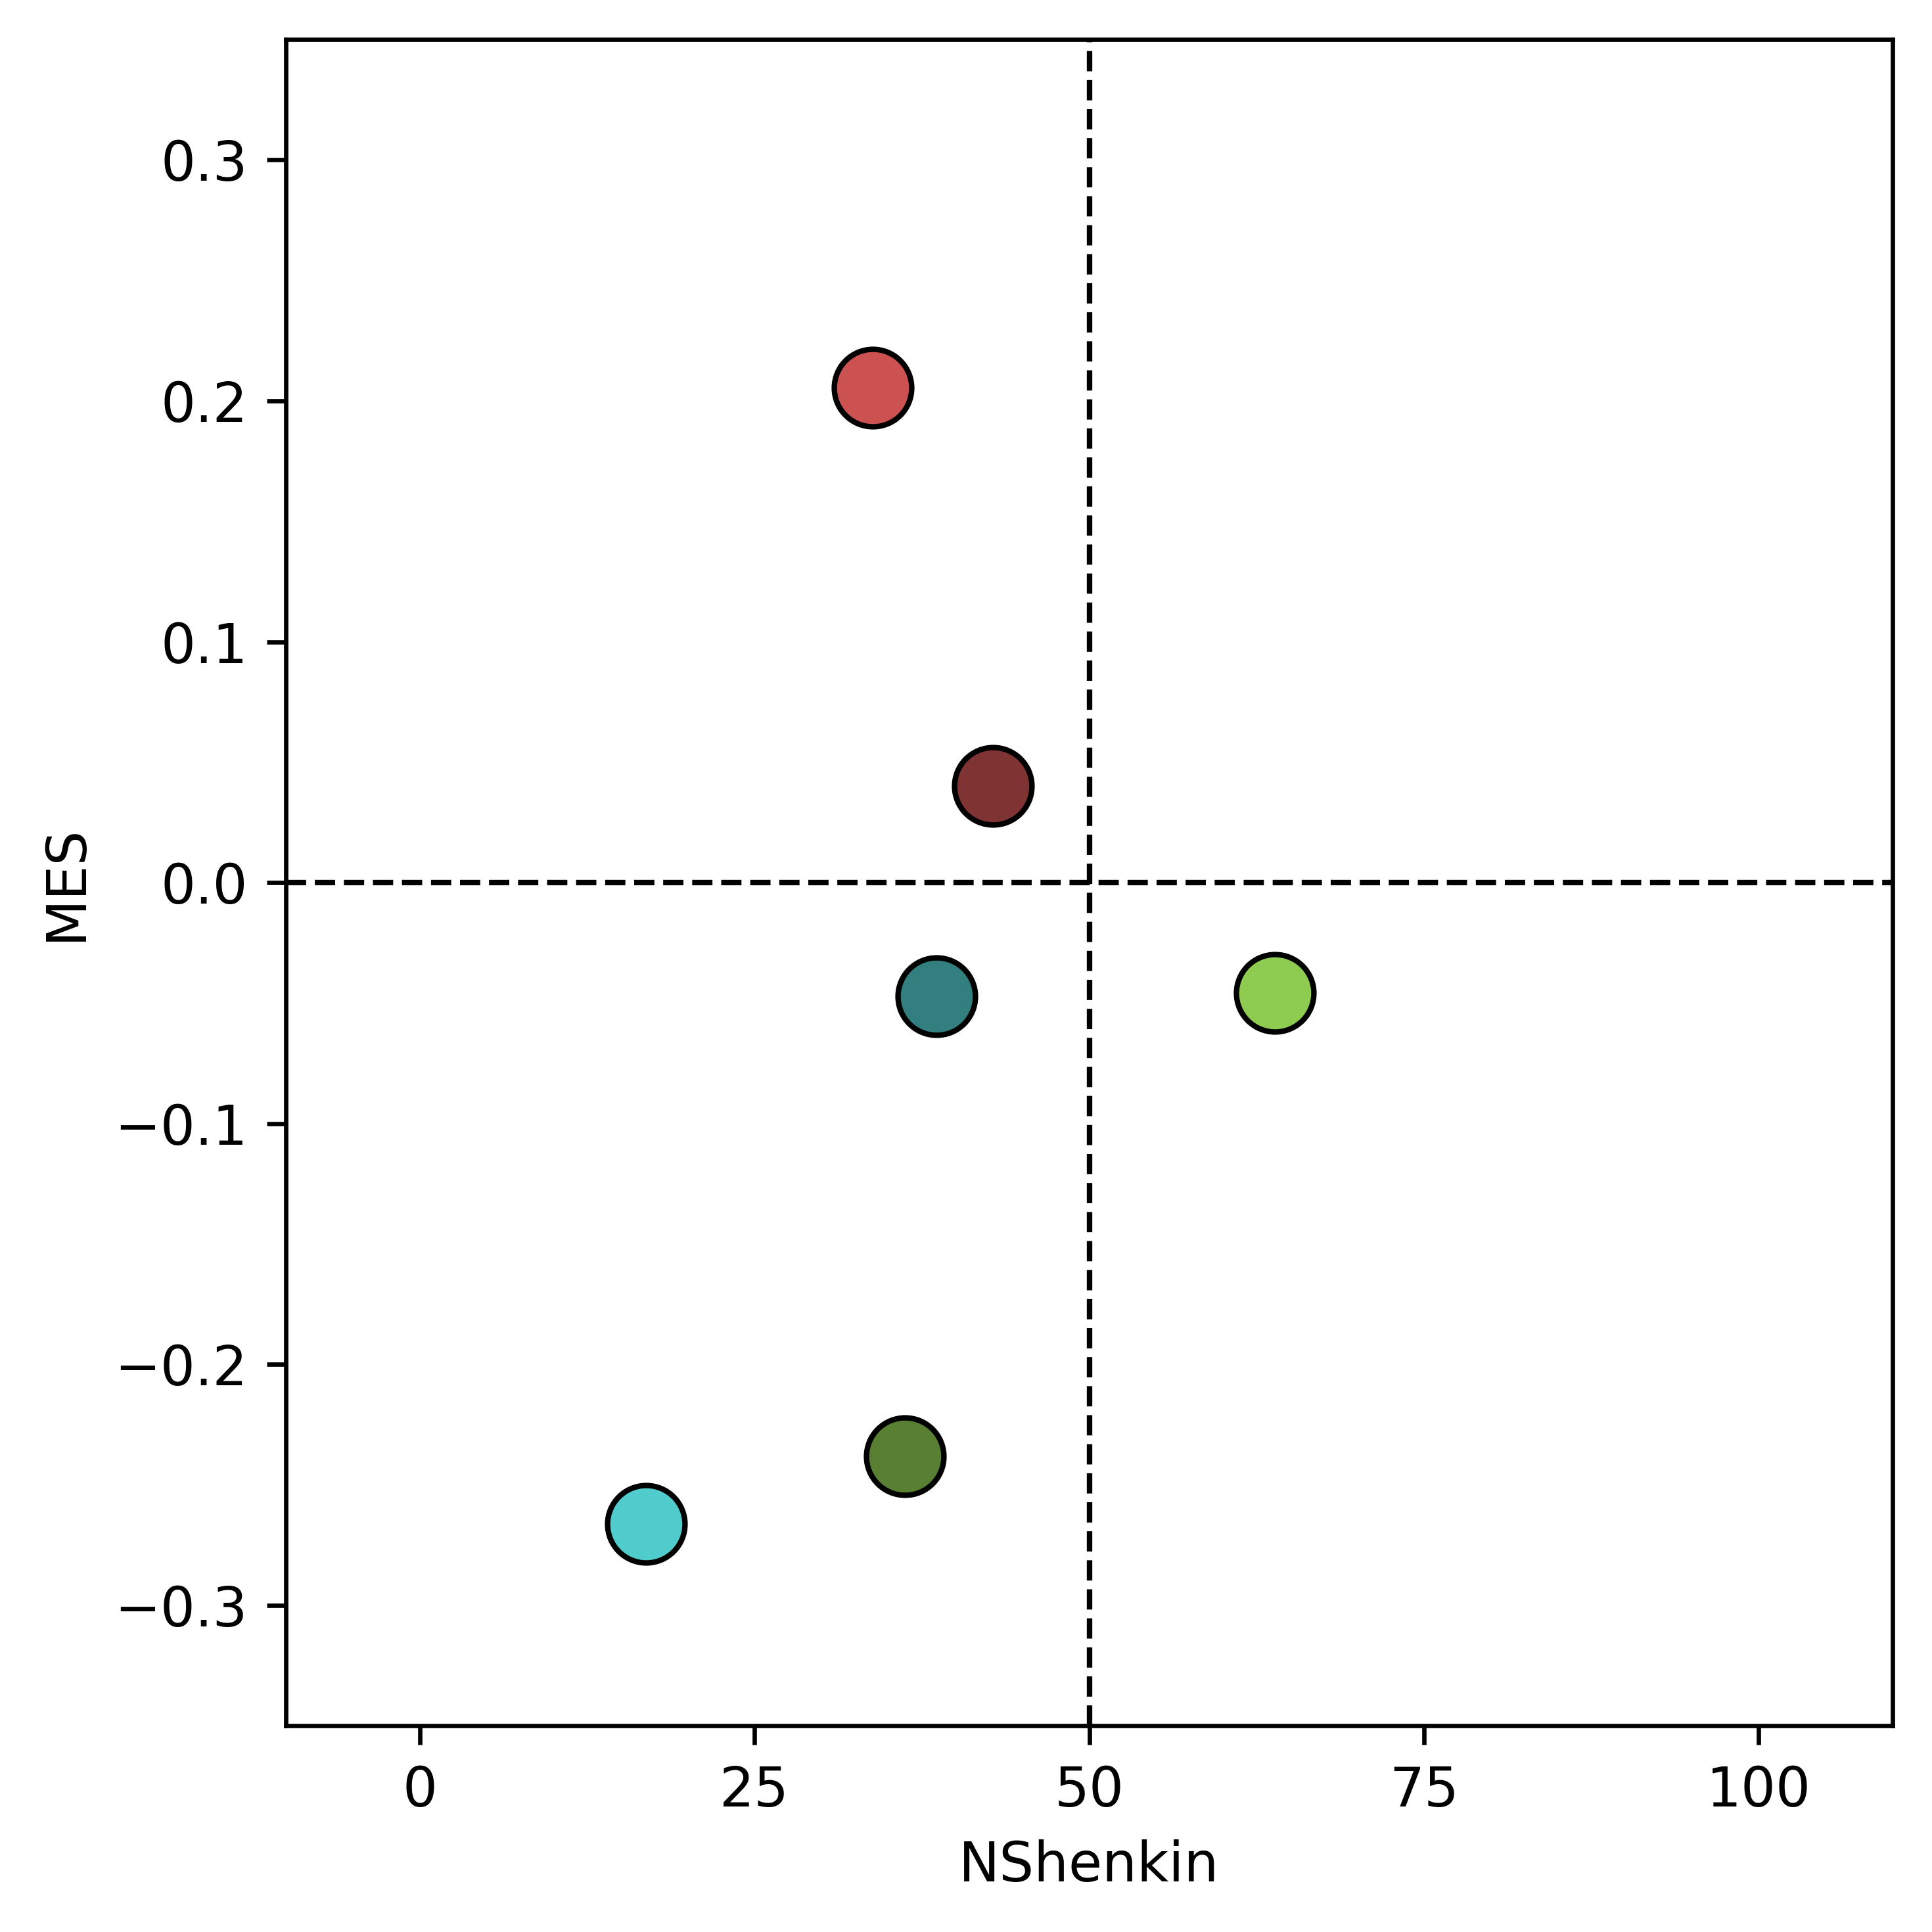

In [9]:
plot_scatter_with_colors(bss.query('protein == "Q5T0W9"'), colors = colors, DPI = 600, out = "./png/FAM83B_binding_sites.png")

## CONSERVATION PLANE FOR FAM83B FRAGMENT SCREENING SITE OF INTEREST

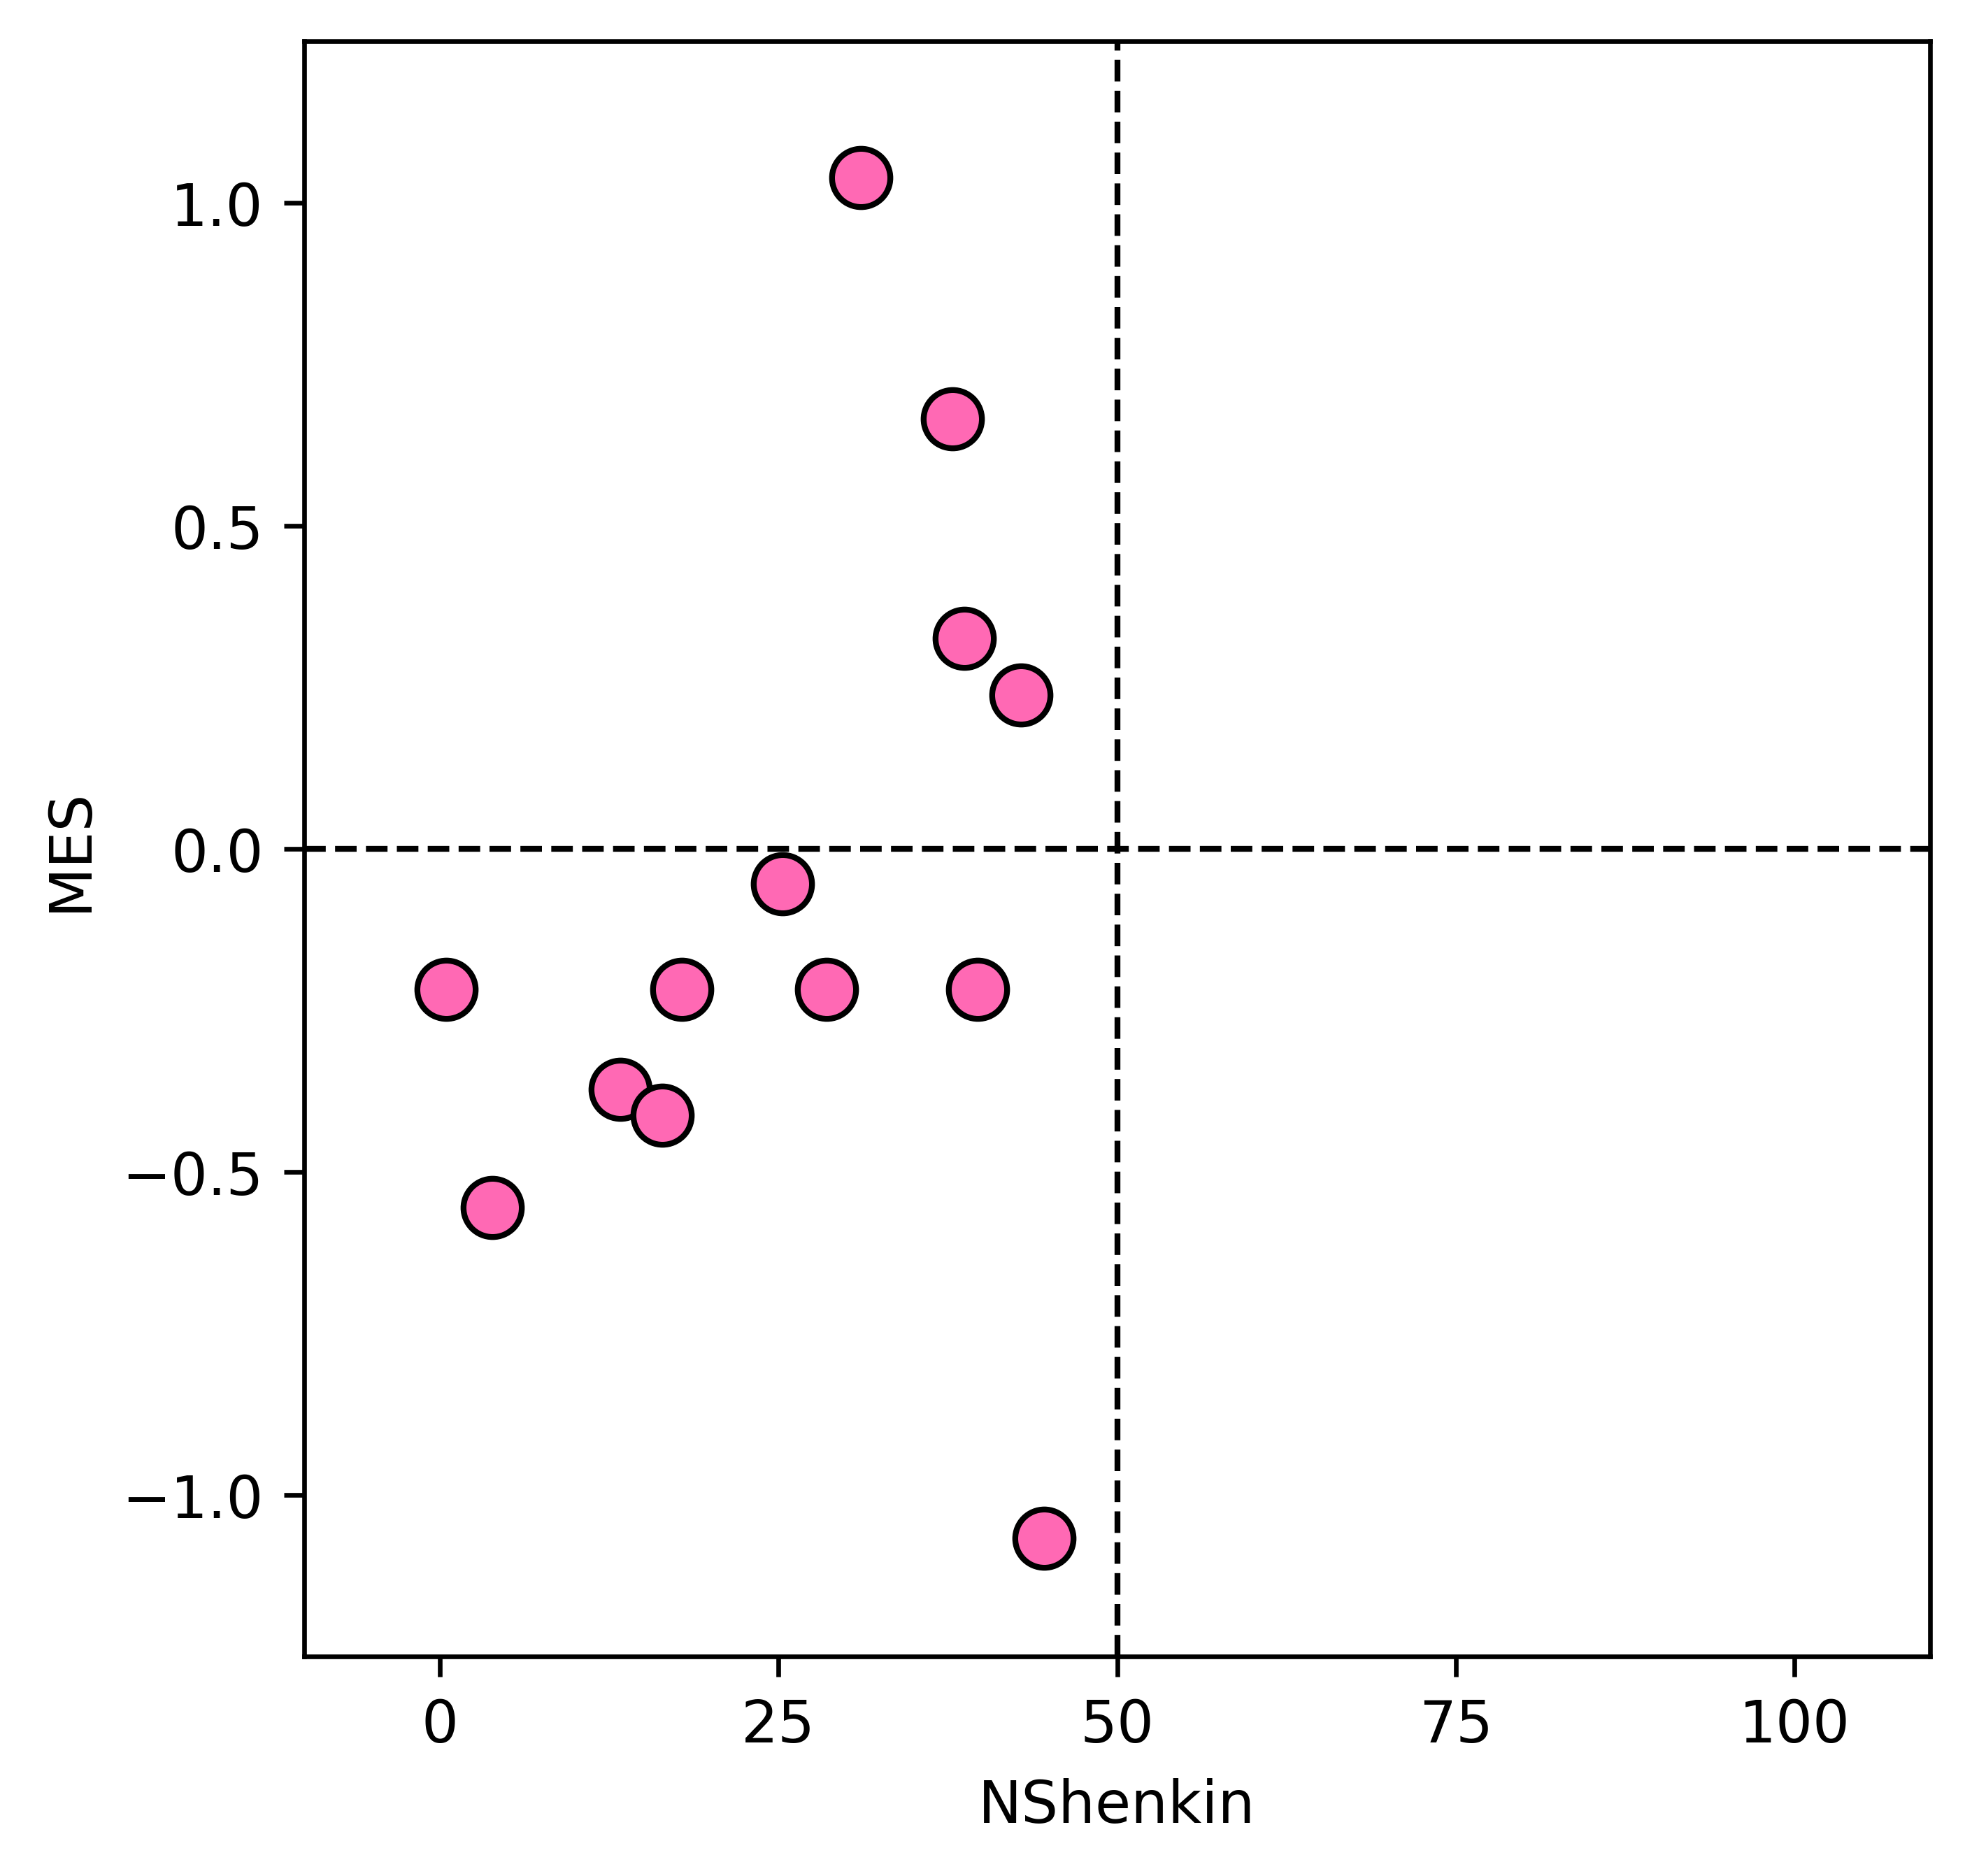

In [10]:
plt.figure(figsize=(5, 5), dpi = 600)
bbone_ress = [150, 178, 207, 234]
site_ress_filt = site_ress.query('UniProt_ResNum not in @bbone_ress')
plt.scatter(site_ress_filt.abs_norm_shenkin, site_ress_filt.log_oddsratio, color = "#FF69B4", s = 100, edgecolor = "k", linewidth = 1)
# Add labels
# for _, row in site_ress_filt.iterrows():
#     label = f"{row['AA']}{row['UniProt_ResNum']}"
#     plt.text(row.abs_norm_shenkin, row.log_oddsratio, label, fontsize=7, ha='center', va='bottom')

plt.xlim(-10, 110)
plt.ylim(-1.25, 1.25)
plt.axhline(y=0, color='black', linestyle='--', linewidth = 1)
plt.axvline(x=50, color='black', linestyle='--', linewidth = 1)
plt.xticks([0, 25, 50, 75, 100])
plt.xlabel("NShenkin")
plt.ylabel("MES")
plt.savefig("./png/FAM83B_binding_site_of_interest.png")
plt.show()